# Lecture 12 - Polymorphism
ITHS/AI22 | 2022-09-27

---

![](../Images/L12_OOP_vectors_poly.png)

In [1]:
# example with Python built-in
print(f"{len([1,23,4])=}")
print(f"{len('1234')=}")

len([1,23,4])=3
len('1234')=4


## Polymorphism in class method

In [15]:
class Fish:
    def __init__(self, name) -> None:
        self.name = name

    # dunder string operator overloads, (overrided) 
    def __str__(self):
        return f"I am a fish with name {self.name}."

    # overrided dunder reppr
    def __repr__(self) -> str:
        return f"Fish(name = '{self.name}')"

    def speak(self):
        print("Blubb blubb")


class Fox:
    def __init__(self,name) -> None:
        self.name = name

    def __str__(self) -> str:
        return f"I am a fox with name {self.name}, my sound is undefinied."

    def speak(self):
        return NotImplemented


In [10]:
fish1 = Fish("Guppie")
str(fish1)

print(fish1) # looks for dunder string, message to user

repr(fish1) # looks for repr, message to other developers

I am a fish with name Guppie.


"Fish(name = 'Guppie')"

In [16]:
fox1 = Fox("McCloud")
animals = (fish1, fox1)

for animal in animals:
    print(animal)
    animal.speak()


I am a fish with name Guppie.
Blubb blubb
I am a fox with name McCloud, my sound is undefinied.


In [26]:
class Rabbit:
    pass
print("Default reppr:")
Rabbit()

Default reppr:


## Operator overloading

Creates vector instances.

In [47]:
from __future__ import annotations # better type hinting
import matplotlib.pyplot as plt

class Vector:
    """A class to represent Euclidean vector with magnitude and direction"""

                       #arbitrary numbers of positional arguments
    def __init__(self, *numbers: float | int) -> None:

        # validation
        for number in numbers:
            if not isinstance(number,(float,int)):
                raise TypeError(f"{number} is not a valid number. nan")

        if len(numbers) == 0:
            raise ValueError("Vector cannot be empty")

                        # Generator expression
        self._numbers = tuple(float(number) for number in numbers)

    # getter
    @property
    def numbers(self) -> tuple:
        """Returns numbers"""
        return self._numbers # -> tuple

    # för att tex. addition ska funka med två vektorer:
    # operator overload + (styr om add-operatorn)
    def __add__(self, other: Vector) -> Vector:
        if self.validate_vectors(other):
            numbers = (a+b for a,b in zip(self.numbers, other.numbers))
            return Vector(*numbers)

    # operator overload - (styr om sub-operatorn)
    def __sub__(self, other: Vector) -> Vector:
        if self.validate_vectors(other):
            numbers = (a-b for a,b in zip(self.numbers, other.numbers))
            return Vector(*numbers) #*numbers => unpack elements from list or tuple

    def validate_vectors(self, other: Vector) -> bool:
        """Validates if two vectors have same len"""
        if not isinstance(other, Vector) or len(other) != len(self):
            raise TypeError("Vectors must have same len.")
        return len(self) == len(other) # Return true if not TypeError

    # to use len() on Vector we have overload it
    def __len__(self) -> int:
        """Returns numer of elements in a Vector, not the length of the Vector"""
        return len(self.numbers)

    # [] operator overload bracket operator
    def __getitem__(self, item: int) -> float:
        return self.numbers[item]

    # overload abs() function (abs, absolut) (norm)
    def __abs__(self) -> float:
        """Returns euclidian 2nd norm"""
        return sum(a**2 for a in self.numbers)**.5 #summera alla element i kvadrat **.5 (sqrt)

    # overload * operator
    def __mul__(self, value: float) -> Vector:
        print("__mul__ called")
        if not isinstance(value, (int, float)):
            raise TypeError(f"The value must be a scalar that is int or float, not {type(value)}")
        numbers = (value*a for a in self.numbers)
        return Vector(*numbers)

    # overload ** pow operator
    def __pow__(self, value: float) -> Vector:
        print("__pow__ called")
        if not isinstance(value, (int,float)):
            raise TypeError(f"The value must be a scalar that is int or float, not {type(value)}")
        numbers = (value**a for a in self.numbers)
        return Vector(*numbers)


    # reflekterar multiplikationen
    def __rmul__(self, value: float) -> Vector:
        print("__rmul__ called")
        return self*value

    def plot(self, *others: "Vector") -> None:
        """Visualize 2D vectors"""
        X, Y = [], []
        for vector in tuple(others):
            if Vector.is2D(vector) and Vector.is2D(self):
                X.append(vector[0])
                Y.append(vector[1])
        
        X.append(self[0])
        Y.append(self[1])
        originX = originY = tuple(0 for _ in range(len(X)))
        plt.quiver(originX, originY, X, Y, scale=1,
                   scale_units="xy", angles="xy")
        plt.xlim(-2, 10)
        plt.ylim(-2, 10)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title(f"{self}, {others}")
        plt.grid()
        plt.show()

    # static method 
    @staticmethod
    def is2D(vector: Vector) -> bool:
        return len(vector) == 2 # Returns true if len = 2, else return false

    def __repr__(self) -> str:
        return f"Vector{self._numbers}"        
    
v1 = Vector(2,3,4)
print(v1)

try:
    v2 = Vector()
except ValueError as err:
    print(err)

v2 = Vector(-1,-2)
print(v2.numbers)

v3 = Vector(2,3)

print(f"{len(v3)=}")


abs(v2)


Vector(2.0, 3.0, 4.0)
Vector cannot be empty
(-1.0, -2.0)
len(v3)=2


2.23606797749979

In [49]:
Vector(3,5)**5

__pow__ called


Vector(125.0, 3125.0)

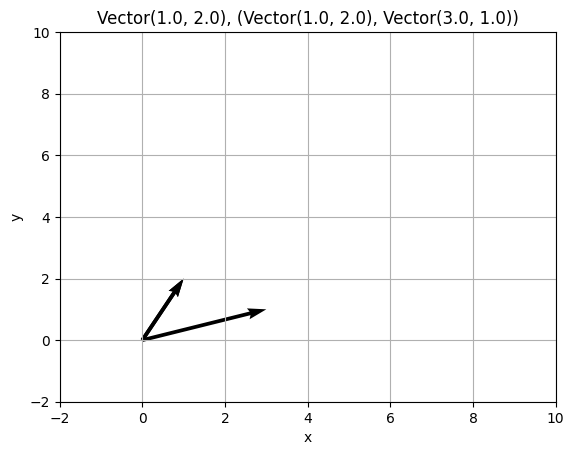

In [45]:
v1 = Vector(1,2)
v2 = Vector(3,1)
v3 = Vector(1,2)

v3.plot(v1,v2)

In [52]:
print(f"{v2=},{v3=}")
print(v2.__add__(v3))

v3 + v2

# addera ints, floats, strings, lists, 

# varje klass har definierad dunder add, olika klasser overridar på olika sätt,
# därför funkar plusoperatorn på olika sätt (polymorphism)

v2=Vector(-1.0, -2.0),v3=Vector(2.0, 3.0)
Vector(1.0, 1.0)


Vector(1.0, 1.0)

In [56]:
print(v2-v3)
print("Ayyyyy")

Vector(-3.0, -5.0)
Ayyyyy


In [4]:
# generator object

gen = (i for i in range(10))
print(gen)
Vector(*gen)

<generator object <genexpr> at 0x10ff43b30>


Vector(0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0)

In [15]:
def f(x1,x2,x3):
    print(x1,x2,x3)

f(1,2,3)

# f([1,2,3]) => doesn't work

# * framför list eller tuple = unpacking argument 
f(*[1,2,3]) # => works!

# Also works with dictionary

my_dict = {'Bulbasaur': 'Gräs/Gift, 1',
 'Ivysaur': 'Gräs/Gift, 2',
 'Venusaur': 'Gräs/Gift, 3',
 'Charmander': 'Eld, 4',
 'Charmeleon': 'Eld, 5',
 'Charizard': 'Eld/Flygande, 6',
 'Squirtle': 'Vatten, 7',
 'Wartortle': 'Vatten, 8',
 'Blastoise': 'Vatten, 9',
}

print(*my_dict)


1 2 3
1 2 3
Bulbasaur Ivysaur Venusaur Charmander Charmeleon Charizard Squirtle Wartortle Blastoise


In [ ]:
isinstance(fish1)

In [61]:
## cannot add 2D vector with 3D vector

# works with 'def __len__'
len(v2), len(v1)

(2, 3)

In [6]:
Vector(1,2)+Vector(1,2)

Vector(2.0, 4.0)

- Calling a function: arguments
- Not calling a function: paremeters

In [7]:
v3 = Vector(1,2)
v4 = Vector(3,1)

print (v3+v4)

Vector(4.0, 3.0)


In [26]:
import matplotlib.pyplot as plt

def plot(self, *others: "Vector") -> None:
    """ Visualize 2D vectors"""
    X, Y = [], []
    for vector in tuple(others):
        if Vector.is2D(vector) and Vector.is2D(self):
            X.append(vector[0])
            Y.append(vector[1])
    
    X.append(self[0])
    Y.append(self[1])
    originX = originY = tuple(0 for _ in range(len(X)))
    plt.quiver(originX, originY, X, Y, scale=1,
               scale_units="xy", angles="xy")
    plt.xlim(-2, 10)
    plt.ylim(-2, 10)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"{self}, {others}")
    plt.grid()
    plt.show()